In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Input, models, layers, optimizers, metrics
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG16

In [3]:
b_size = 5
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, #수평 대칭 이미지를 50% 확률로 만듬
                                   width_shift_range=0.1, #width_shift_range 전체 크기의 10% 범위에서 좌우로이동
                                  height_shift_range=0.1, fill_mode='nearest') 
train_generator = train_datagen.flow_from_directory('deeplearning/run_project/train', target_size=(150,150), batch_size=b_size,
                                                     class_mode='binary')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('deeplearning/run_project/test', target_size=(150,150), batch_size=b_size,
                                                     class_mode='binary')

Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [5]:
transfer_model = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3)) # include_top=False Fully Connected 를 뻈다
transfer_model.trainable=False
transfer_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [8]:
finetune_model = Sequential()
finetune_model.add(transfer_model)
finetune_model.add(Flatten())
finetune_model.add(Dense(64, activation='relu'))
finetune_model.add(Dense(2, activation='softmax'))

In [10]:
finetune_model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])
steps_train = len(train_generator)
steps_test = len(test_generator)

In [11]:
history = finetune_model.fit(
       train_generator,
       steps_per_epoch=steps_train,
       epochs=20,
       validation_data=test_generator,
       validation_steps=steps_test )

Epoch 1/20
32/32 [==============================] - 15s 468ms/step - loss: 0.8157 - accuracy: 0.5625 - val_loss: 0.5497 - val_accuracy: 0.6500
Epoch 2/20
32/32 [==============================] - 15s 456ms/step - loss: 0.4235 - accuracy: 0.8625 - val_loss: 0.3638 - val_accuracy: 0.9000
Epoch 3/20
32/32 [==============================] - 15s 453ms/step - loss: 0.3039 - accuracy: 0.9250 - val_loss: 0.3879 - val_accuracy: 0.8000
Epoch 4/20
32/32 [==============================] - 14s 453ms/step - loss: 0.2533 - accuracy: 0.9000 - val_loss: 0.2491 - val_accuracy: 0.9417
Epoch 5/20
32/32 [==============================] - 15s 470ms/step - loss: 0.2122 - accuracy: 0.9375 - val_loss: 0.2681 - val_accuracy: 0.9000
Epoch 6/20
32/32 [==============================] - 15s 471ms/step - loss: 0.1826 - accuracy: 0.9688 - val_loss: 0.1911 - val_accuracy: 0.9333
Epoch 7/20
32/32 [==============================] - 15s 459ms/step - loss: 0.1564 - accuracy: 0.9688 - val_loss: 0.1724 - val_accuracy: 0.9583

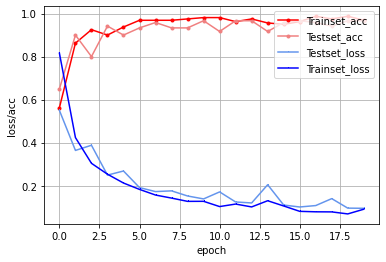

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, acc, marker='.', c='red', label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c='lightcoral', label='Testset_acc')
plt.plot(x_len, y_vloss, marker=',', c='cornflowerblue', label='Testset_loss')
plt.plot(x_len, y_loss, marker=',', c='blue', label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()